<a href="https://colab.research.google.com/github/kazahayan/net-worth-demo/blob/main/net_worth_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power of Compound Interest: Net Worth After 100k

**Niki Kazahaya** | [LinkedIn](https://www.linkedin.com/in/nikikazahaya/)

There are many [articles/videos](https://www.youtube.com/watch?v=U1mcmB4oQU0) online about the first 100k being the largest hurdle in building wealth. For those unfamiliar, consistent investing (even with small contributions) over time can yield large returns due to compound interest.

While the 100k mark is a bit arbitrary, the idea still holds: as your net worth grows, compound interest does an increasing amount of the heavy lifting. This is a result of not only earning interest on your current contributions but also on:
* Previous contributions
* Interest earned from your previous contributions

I wrote this Python notebook as a visual demonstration of the power of compound interest. I'd encourage you to clone this notebook and experiment with different scenarios of annual contributions and returns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

In [2]:
def calculate_years_to_target(target, initial_investment, monthly_contribution, annual_contribution, annual_interest_rate):
  balance = initial_investment
  contributions = initial_investment
  interest_earned = 0
  years = 0

  running_total_list = [balance]
  contributions_list = [contributions]
  interest_earned_list = [interest_earned]

  while balance < target:
    new_contributions = (monthly_contribution * 12) + annual_contribution
    contributions += new_contributions
    balance += new_contributions

    prev_balance = balance
    balance *= (1 + annual_interest_rate / 100)
    yearly_interest = balance - prev_balance
    interest_earned += yearly_interest

    years += 1
    running_total_list.append(balance)
    contributions_list.append(contributions)
    interest_earned_list.append(interest_earned)

  final_balance = running_total_list[-1] # first year over the target
  prev_balance = running_total_list[-2]  # would be the last year under the target
  excess = (target - prev_balance) / (final_balance - prev_balance)  # proportion of the final year to get to the target
  exact_years = years - 1 + excess

  return running_total_list, contributions_list, interest_earned_list, exact_years

## First 100k

Let's look at how long it takes to reach your first 100k. We are assuming the following numbers (and feel free to tweak these!):

* S&P 500 on average over the last ~100 years has returned **10% per year**.
* Inflation historically has been **3% per year**.
* We will assume **7% per year** as our true return from investing in the market.

We will start with no money previous invested and with a contribution of **$10,000 per year** spread out over 12 months.

In [3]:
initial_investment = 0

annual_one_time_contribution = 0  # this is for a one time annual contribution

# annual contribution spread out 12 months
annual_contribution = 10000
monthly_contribution = round(annual_contribution / 12, 2)

annual_interest_rate = 7

target = 100000
target_formatted = f"${target:,.0f}"

print(f"Starting balance: {initial_investment}")
print(f"Monthly contribution: ${monthly_contribution:.2f}")
print(f"Annual contribution: {annual_one_time_contribution}")
print(f"Annual rate of return: {annual_interest_rate}%")

Starting balance: 0
Monthly contribution: $833.33
Annual contribution: 0
Annual rate of return: 7%


In [4]:
(
    annual_total_list,
    contributions_total_list,
    interest_total_list,
    exact_years,
) = calculate_years_to_target(
    target,
    initial_investment,
    monthly_contribution,
    annual_one_time_contribution,
    annual_interest_rate,
)

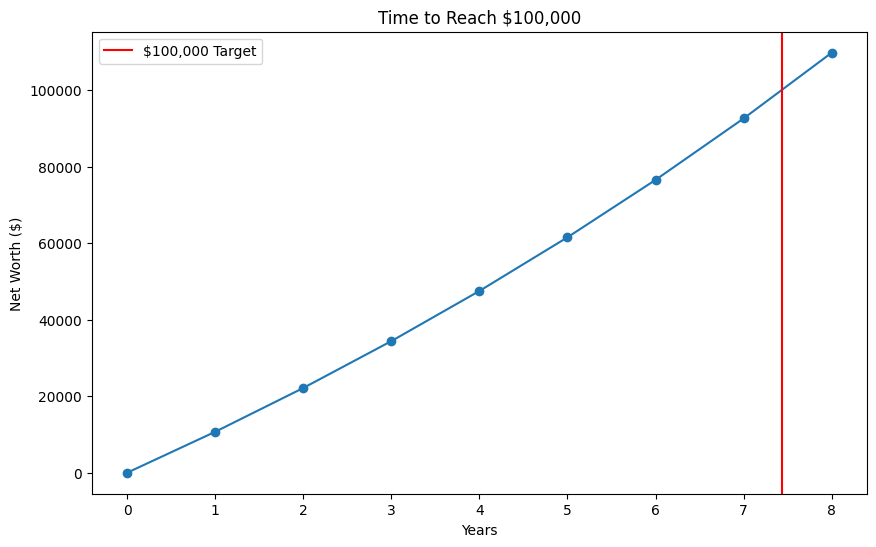

It takes approximately 7.4 years to reach $100,000.


In [5]:
# visual representation
years = list(range(len(annual_total_list)))

plt.figure(figsize=(10, 6))
plt.plot(years, annual_total_list, marker='o', linestyle='-')

plt.axvline(x=exact_years, color='r', linestyle='-', label=f"{target_formatted} Target")

plt.xlabel("Years")
plt.ylabel("Net Worth ($)")
plt.title(f"Time to Reach {target_formatted}")
plt.legend()
# plt.grid(True)

plt.show()
print(f"It takes approximately {exact_years:.1f} years to reach {target_formatted}.")

It takes a little over 7 years to reach your first 100k in net worth. Let's see how much of that is attributed to contributions vs interest.

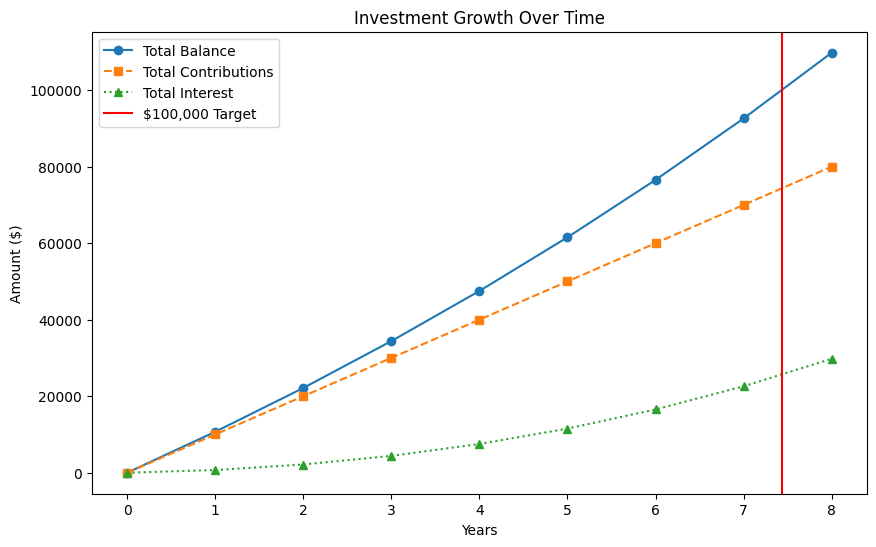

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(years, annual_total_list, label="Total Balance", marker='o')
plt.plot(years, contributions_total_list, label="Total Contributions", linestyle='--', marker='s')
plt.plot(years, interest_total_list, label="Total Interest", linestyle=':', marker='^')

plt.axvline(x=exact_years, color='r', linestyle='-', label=f"{target_formatted} Target")
# plt.axvline(x=exact_years, color='r', linestyle='-')

plt.xlabel("Years")
plt.ylabel("Amount ($)")
plt.title("Investment Growth Over Time")
plt.legend()
# plt.grid(True)
plt.show()

You'll notice that early in your investing career the difference between contributions and net worth is relatively small. Over time, that gap grows and interest plays a larger role in your total net worth. Run the cell below to see how much interest you've earned after your first 100k.

In [7]:
first_100k_interest = interest_total_list[-1]
first_100k_interest_message = f"By the end of year {int(exact_years)}, you will have earned ${first_100k_interest:,.2f} in interest alone!"
print(first_100k_interest_message)

By the end of year 7, you will have earned $29,779.77 in interest alone!


## After First 100k: Getting to 1MM

Let's continue to see how long it takes to reach **10x your first milestone**. We will see how long it takes to get to $1MM in net worth. We will make no changes to our annual contribution and our rate of return.

In [8]:
# assuming all other contributions stay the same
target_beyond = target * 10  # million
target_beyond_formatted = f"${target_beyond:,.0f}"

In [9]:
(
    annual_total_beyond_list,
    contributions_total_beyond_list,
    interest_total_beyond_list,
    exact_years_beyond,
) = calculate_years_to_target(
    target_beyond,
    initial_investment,
    monthly_contribution,
    annual_one_time_contribution,
    annual_interest_rate,
)

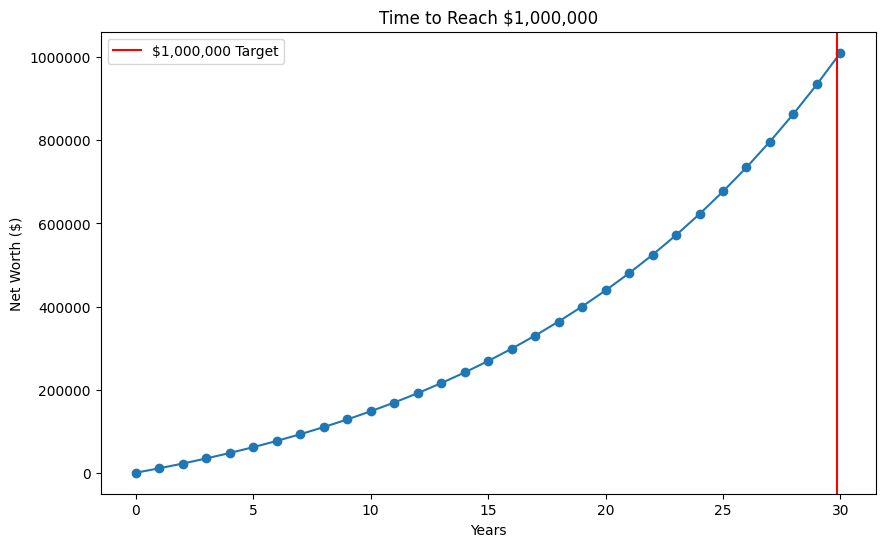

It takes approximately 29.9 years to reach $1,000,000.


In [10]:
# visual representation
years_beyond = list(range(len(annual_total_beyond_list)))
# print(years_beyond)

plt.figure(figsize=(10, 6))
plt.plot(years_beyond, annual_total_beyond_list, marker='o', linestyle='-')

plt.axvline(x=exact_years_beyond, color='r', linestyle='-', label=f"{target_beyond_formatted} Target")

plt.xlabel("Years")
plt.ylabel("Net Worth ($)")
plt.title(f"Time to Reach {target_beyond_formatted}")
plt.legend()
# plt.grid(True)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.show()
print(f"It takes approximately {exact_years_beyond:.1f} years to reach {target_beyond_formatted}.")

This is very interesting. **For 10x the net worth, it does not take 10x the amount of time.** Run the cell below to see how much longer it takes than your first 100k.

In [11]:
times_longer = exact_years_beyond/exact_years
time_reach_1mm = f"It took only {times_longer:.2f} times longer to get from 0-{target_beyond_formatted} compared to 0-{target_formatted}."
print(time_reach_1mm)

It took only 4.02 times longer to get from 0-$1,000,000 compared to 0-$100,000.


Let's investigate and replicate the above graph with some more detail. Let's plot on the x axis when we reach each 100k interval leading up to 1 million. There should be ten gray dashed lines for each 100k increment.

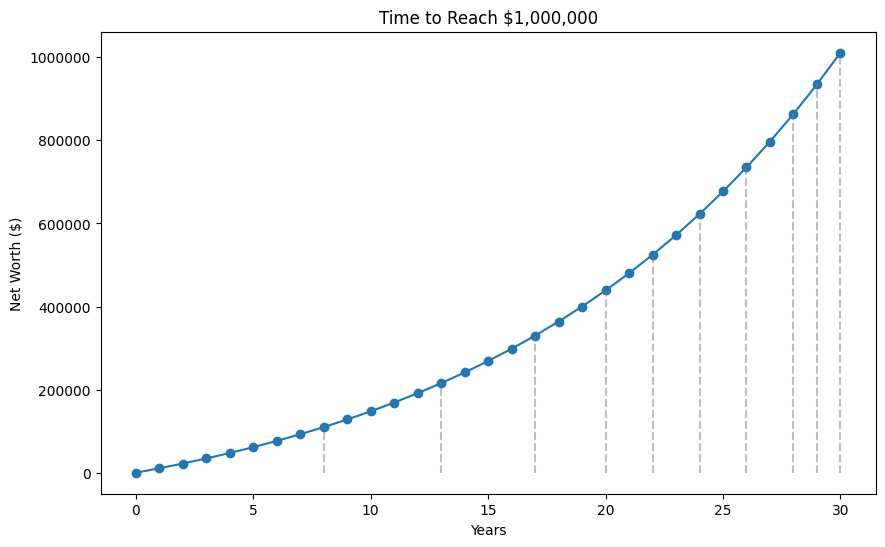

Grey vertical line indicates increment of 100k was reached.


In [12]:
plt.figure(figsize=(10, 6))
plt.plot(years_beyond, annual_total_beyond_list, marker='o', linestyle='-')

milestones = np.arange(100000, max(annual_total_beyond_list) + 100000, 100000)  # Every 100k

for milestone in milestones:
  for i, net_worth in enumerate(annual_total_beyond_list):
    if net_worth >= milestone:
      plt.vlines(x=i, ymin=0, ymax=net_worth, color='gray', linestyle='--', alpha=0.5)
      break

plt.xlabel("Years")
plt.ylabel("Net Worth ($)")
plt.title(f"Time to Reach {target_beyond_formatted}")

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.show()
print("Grey vertical line indicates increment of 100k was reached.")

Notice that as you go up in years, the amount it takes to reach the subsequent 100k interval gets smaller and smaller. Let's calculate precisely how many additional years it takes for each 100k milestone.

In [13]:
years_to_next_milestone = []
last_milestone_year = 0

for milestone in milestones:
  for year in range(1, len(annual_total_beyond_list)):  # Start from year 1 to compare with previous year
    prev_balance = annual_total_beyond_list[year - 1]
    curr_balance = annual_total_beyond_list[year]

    if curr_balance >= milestone:
      excess = (milestone - prev_balance) / (curr_balance - prev_balance)
      exact_year = (year - 1) + excess

      # calculate time since last milestone and add to list
      time_to_milestone = round(exact_year - last_milestone_year, 1)
      years_to_next_milestone.append(time_to_milestone)

      last_milestone_year = exact_year  # update the last milestone year
      break  # move to the next milestone

# print(years_to_next_milestone)
# print(last_milestone_year)

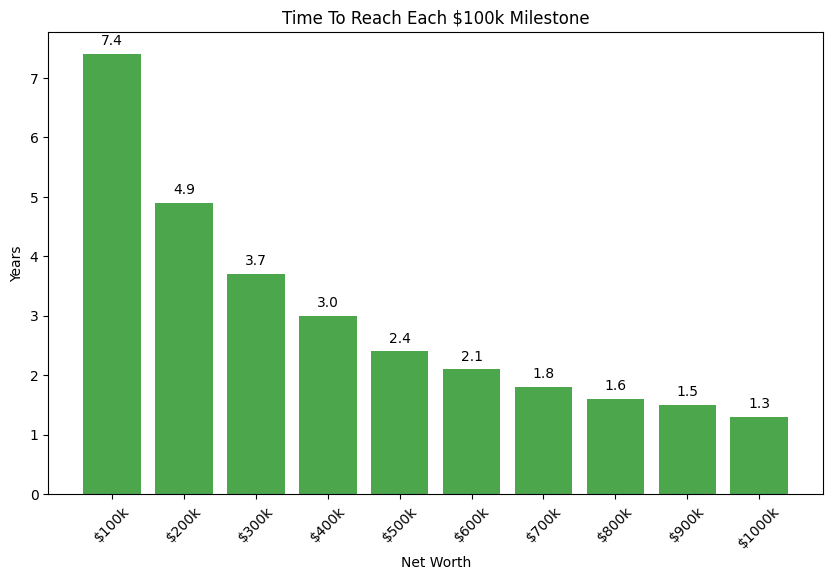

Note: Each value is the additional number of years after reaching the previous milestone. For example, it took another 4.9 years after hitting 100k to reach 200k.


In [14]:
bar_milestones = np.arange(100000, len(years_to_next_milestone) * 100000 + 1, 100000)
bar_milestone_labels = [f"${bm//1000}k" for bm in bar_milestones]

plt.figure(figsize=(10, 6))
bars = plt.bar(bar_milestone_labels, years_to_next_milestone, color='green', alpha=0.7)

# adds values above each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1,  # Adjust position above the bar
           f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Net Worth")
plt.ylabel("Years")
plt.title("Time To Reach Each $100k Milestone")

plt.xticks(rotation=45)

# plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
print(f"Note: Each value is the additional number of years after reaching the previous milestone. For example, it took another {years_to_next_milestone[1]} years after hitting 100k to reach 200k.")

Whoa! It takes 1.3 years to go from 900k to 1 million but 7.4 years from 0 to 100k. This is why that first milestone is the hardest. It's literally downhill from there. This is compound interest doing its work. Let's take a closer look to see how much work interest is doing.

In [15]:
contributions_at_milestones = []
interest_at_milestones = []

last_milestone_year = 0

for milestone in milestones:
  for year in range(1, len(annual_total_beyond_list)):
    prev_balance = annual_total_beyond_list[year - 1]
    curr_balance = annual_total_beyond_list[year]
    prev_contrib = contributions_total_beyond_list[year - 1]
    curr_contrib = contributions_total_beyond_list[year]
    prev_interest = interest_total_beyond_list[year - 1]
    curr_interest = interest_total_beyond_list[year]

    if curr_balance >= milestone:
      excess = (milestone - prev_balance) / (curr_balance - prev_balance)
      exact_year = (year - 1) + excess
      exact_contrib = prev_contrib + (curr_contrib - prev_contrib) * excess
      exact_interest = (prev_balance + (curr_balance - prev_balance) * excess) - exact_contrib

      contributions_at_milestones.append(exact_contrib)
      interest_at_milestones.append(exact_interest)

      last_milestone_year = exact_year
      break

# print(contributions_at_milestones)
# print(interest_at_milestones)

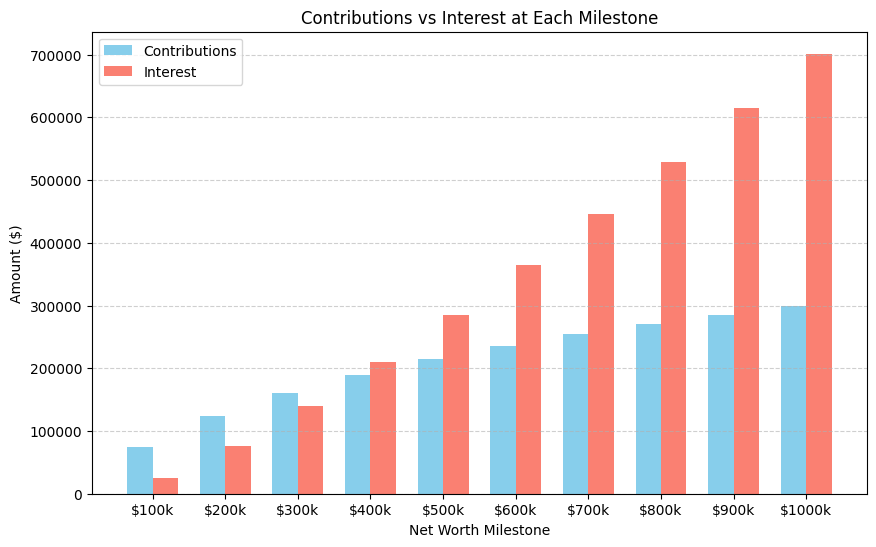

In [16]:
x = np.arange(len(bar_milestones))  # the x locations for the groups
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_contrib = ax.bar(x - width/2, contributions_at_milestones, width, label='Contributions', color='skyblue')
bars_interest = ax.bar(x + width/2, interest_at_milestones, width, label='Interest', color='salmon')

ax.set_xlabel("Net Worth Milestone")
ax.set_ylabel("Amount ($)")
ax.set_title("Contributions vs Interest at Each Milestone")

ax.set_xticks(x)
ax.set_xticklabels(bar_milestone_labels)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.legend()

plt.show()

Do you notice something that has changed between 200k and 300k? It's the first milestone where interest has exceeded your contributions. By the last 100k, interest is very large portion of your entire net worth.

Because these milestones can represent several years, let's break it down year-by-year.

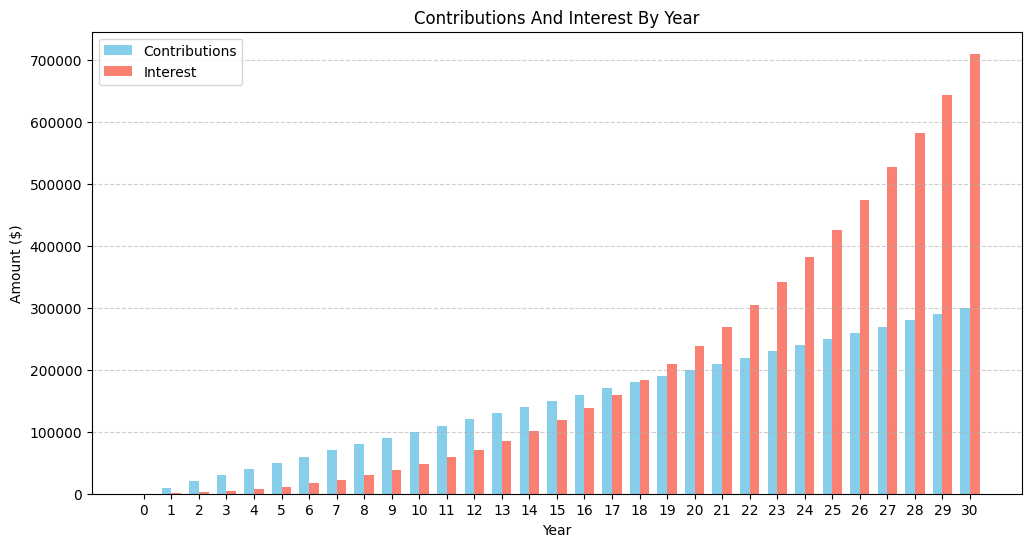

In [17]:
# years_beyond = list(range(1, len(contributions_total_beyond_list) + 1))

x = np.arange(len(years_beyond))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars_contrib = ax.bar(x - width/2, contributions_total_beyond_list, width, label='Contributions', color='skyblue')
bars_interest = ax.bar(x + width/2, interest_total_beyond_list, width, label='Interest', color='salmon')

ax.set_xlabel("Year")
ax.set_ylabel("Amount ($)")
ax.set_title("Contributions And Interest By Year")

ax.set_xticks(x)
ax.set_xticklabels(years_beyond)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.legend()

plt.show()

Look closely between Year 18 & 19. This is an important tipping point. You are making more from interest that what you have actually contributed. Since we are assuming constant contributions, it's a gradual increase over time. However, look how much interest is snowballing after Year 19. At this point, your contributions alone cannot keep pace with money earned from interest.

Let's compare how your net worth is distributed between contributions and interest between the first and last 100k.

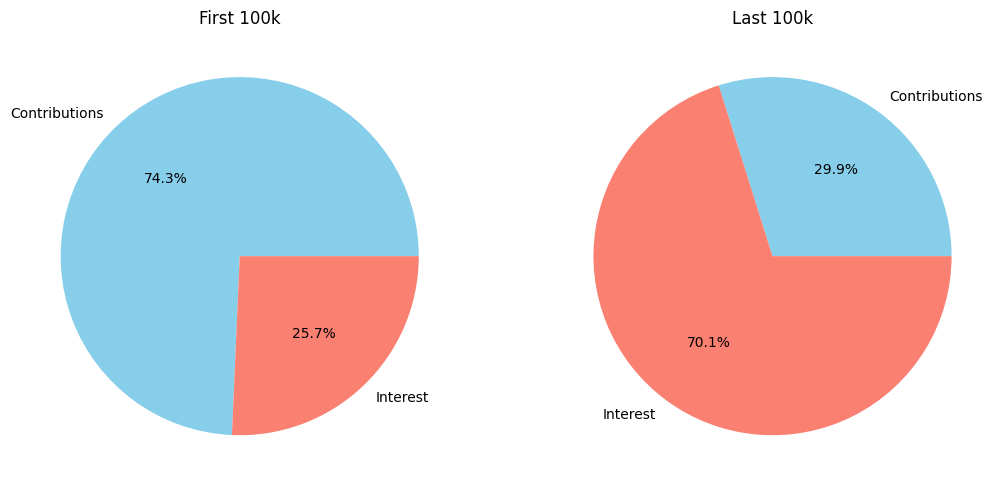

By your last 100k milestone, 70.1% of your net worth is from money you never earned. It's driven by interest alone!


In [18]:
first_contribution = contributions_at_milestones[0]
first_interest = interest_at_milestones[0]

last_contribution = contributions_at_milestones[-1]
last_interest = interest_at_milestones[-1]

interest_pct_final = last_interest/(last_interest + last_contribution) * 100

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].pie([first_contribution, first_interest], labels=['Contributions', 'Interest'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('First 100k')

axes[1].pie([last_contribution, last_interest], labels=['Contributions', 'Interest'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Last 100k')

plt.tight_layout()
plt.show()

print(f"By your last 100k milestone, {interest_pct_final:.1f}% of your net worth is from money you never earned. It's driven by interest alone!")